**1\. Import the different libraries to be used for the data exploration and prediction**

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns # Data visualization
import numpy as np   #fundamental package for scientific computing
import pandas as pd  #fundamental package for data analysis
from sklearn.ensemble import RandomForestClassifier #package for binary classification

In [95]:
!ls

100.jpg					     test_data.csv.csv_fixed
charles_verleyen_analysis_predictions.ipynb  Test Task.pdf
README.md				     train_data.csv.csv_fixed


**2\. Read the train_data and assign it to the variable "df"**

In [96]:
df = pd.read_csv("train_data.csv.csv_fixed")

**3\. Data exploration**

In [5]:
df.head()

,user_id,channel,age,os,gender,country,customer
0,100000,00 Organic,20,ios,female,GB,0
1,100001,00 Organic,30,ios,female,US,1
2,100002,31 OUTBRAIN,35,ios,female,DE,0
3,100003,00 Organic,26,android,female,US,0
4,100004,32 Taboola,55,ios,female,US,1


In [46]:
df.info() #high overview of the dataset with columns datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82908 entries, 0 to 82907
Data columns (total 7 columns):
user_id     82908 non-null int64
channel     82908 non-null object
age         82908 non-null int64
os          82908 non-null object
gender      82908 non-null object
country     82908 non-null object
customer    82908 non-null int64
dtypes: int64(3), object(4)
memory usage: 4.4+ MB


In [47]:
df.describe() #handy statistics about numerical columns

,user_id,age,customer
count,82908.000000,82908.000000,82908.000000
mean,141453.500000,31.151734,0.297848
std,23933.622396,11.596902,0.457315
min,100000.000000,12.000000,0.000000
25%,120726.750000,22.000000,0.000000
50%,141453.500000,29.000000,0.000000
75%,162180.250000,38.000000,1.000000
max,182907.000000,96.000000,1.000000


In [48]:
df["channel"].unique()

array(['00 Organic', '31 OUTBRAIN', '32 Taboola', '22 Adwords (Search)',
       '42 Adcolony', '12 PINTEREST', '11 FB', '41 Youtube',
       '61 Web/Content', '95 LAT', '69 Others', '21 ASA', '62 Social Media'], dtype=object)

In [49]:
df["country"].unique()

array(['GB', 'US', 'DE', 'MX', 'ES', 'AU', 'CA', 'FR'], dtype=object)

In [50]:
df["age"].unique()

array([20, 30, 35, 26, 55, 36, 31, 19, 23, 22, 24, 47, 14, 50, 32, 46, 38,
       40, 41, 13, 17, 25, 29, 27, 48, 49, 21, 52, 42, 34, 45, 39, 43, 33,
       16, 18, 59, 56, 28, 53, 37, 12, 54, 60, 44, 51, 15, 61, 68, 58, 62,
       57, 64, 65, 69, 63, 66, 70, 67, 71, 73, 76, 77, 72, 95, 78, 80, 75,
       74, 79, 82, 87, 86, 94, 85, 96, 83, 81])

In [51]:
df["os"].unique()

array(['ios', 'android'], dtype=object)

In [52]:
for i in df.columns:
    if df[i].dtype == "O":
        print(i)

channel
os
gender
country


In [53]:
df.isnull().sum() #clean dataset with no "nan" values

user_id     0
channel     0
age         0
os          0
gender      0
country     0
customer    0
dtype: int64

**4\. Data visualization**

In [67]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (20, 20)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

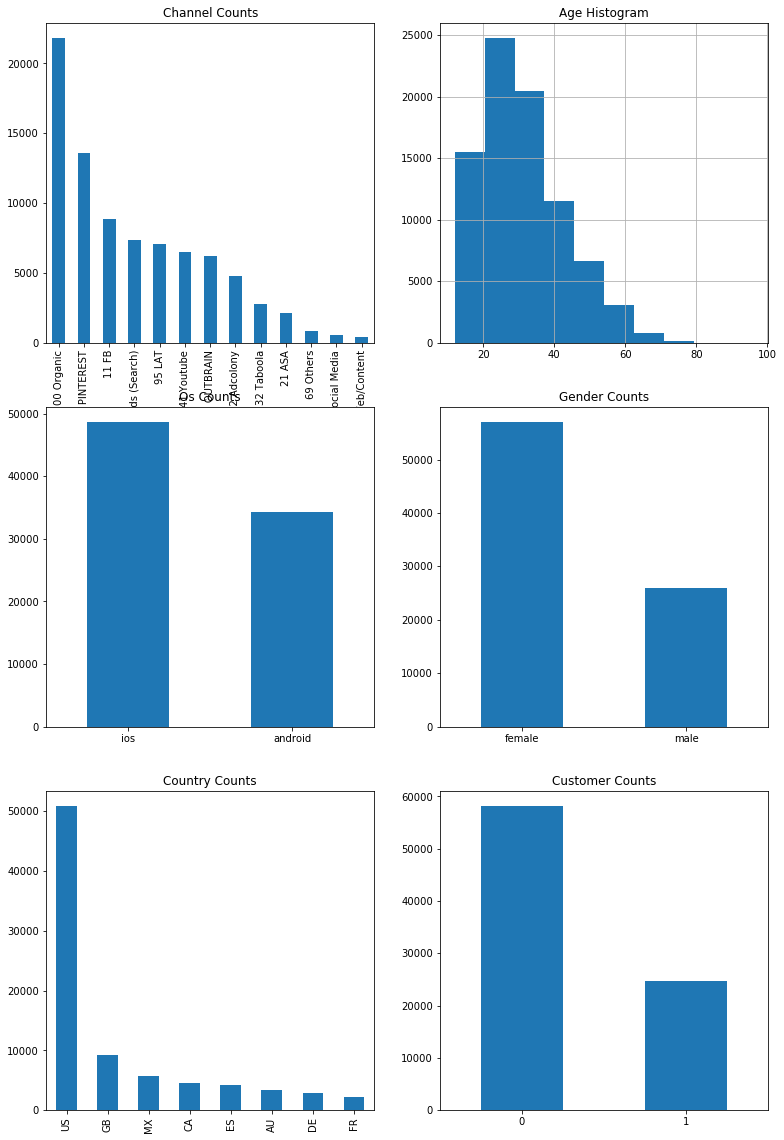

In [74]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 3)

# Plot channel counts
plt.subplot2grid(fig_dims, (0, 0))
df['channel'].value_counts().plot(kind='bar', 
                                         title='Channel Counts')

# Plot age counts
plt.subplot2grid(fig_dims, (0, 1))
df['age'].hist()
plt.title('Age Histogram')

# Plot os counts
plt.subplot2grid(fig_dims, (1, 0))
df['os'].value_counts().plot(kind='bar', 
                                    title='Os Counts')
plt.xticks(rotation=0)


# Plot gender counts
plt.subplot2grid(fig_dims, (1, 1))
df['gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')
plt.xticks(rotation=0)

# Plot country counts
plt.subplot2grid(fig_dims, (2, 0))
df['country'].value_counts().plot(kind='bar', 
                                         title='Country Counts')

# Plot customer counts
plt.subplot2grid(fig_dims, (2, 1))
df['customer'].value_counts().plot(kind='bar', 
                                         title='Customer Counts')
plt.xticks(rotation=0)

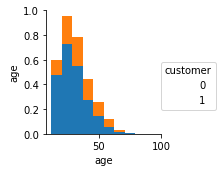

In [85]:
df2 = df.drop('user_id', axis = 1)
sns.pairplot(df2, hue="customer", vars=["age"])

**5\. Data Cleaning**

In [97]:
df = df.drop('user_id', axis = 1) #remove the user_id as this is irrelevant for the prediction

In [98]:
#need to make a for loop on the object columns and concat every time there is a new dummies from variables
pd.get_dummies(df["channel"],prefix = "chan")
pd.get_dummies(df["os"],prefix = "chan")
pd.get_dummies(df["gender"],prefix = "chan")
pd.get_dummies(df["country"],prefix = "chan")

,chan_AU,chan_CA,chan_DE,chan_ES,chan_FR,chan_GB,chan_MX,chan_US
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0


**6\. Machine Learning (Prediction)**

In [89]:
df_x = df[["channel","age","os","gender","country"]]
df_y = df["customer"]

In [90]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(df_x, df_y)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

ValueError: could not convert string to float: 'US'